# Optimizing function 3: RMSprop

## Dataset

This is a data set of 11,228 Reuters news stories, tagged into 46 topics. There are 46 theme categories into which a story can be categorized into (so it's not a binary classification).

Each news item is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the data set, so that, for example, the integer "3" encodes the third most frequent word in the data. This allows quick filtering operations such as: "consider only the 10,000 most common words, but eliminate the 20 most common words." Note: Here, it has been used the same dataset as a previous example. For more insights on the dataset and the processing steps, please take a look at the following notbook that is in the same folder: Text_classification(mini-Batch Gradient Descent).ipynb

## Loading dataset

In [ ]:
from tensorflow.keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
print("Trainning data:", len(train_data))
print("Testing data:", len(test_data))

Trainning data: 8982
Testing data: 2246


In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
word_index = reuters.get_word_index()


550378/550378 [==============================] - 0s 0us/step


In [ ]:
reversed_word_index = {v: k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '(' + str(i) + ')') for i in train_data[0]])

'(1) (2) (2) said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

## Preprocessing

In [ ]:
import numpy as np

def vectorize(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

In [ ]:
X_train = vectorize(train_data, 10000)
X_test = vectorize(test_data, 10000)

In [ ]:
print("Original values:\t", train_data[0][:15])
print("Vectorized values:\t", X_train[0][:15])

Original values:	 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]
Vectorized values:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [ ]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]

3

In [ ]:
Y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

## ANN construction

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
from tensorflow.keras import optimizers

opt_func = optimizers.RMSprop()

In [ ]:
model.compile(
    optimizer=opt_func,
    loss='categorical_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [ ]:
len(X_train) / 32

280.6875

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, Y_val))

Epoch 1/30
281/281 [==============================] - 20s 69ms/step - loss: 1.1000 - accuracy: 0.7626 - precision: 0.8862 - val_loss: 0.9095 - val_accuracy: 0.7961 - val_precision: 0.8742
Epoch 2/30
281/281 [==============================] - 18s 65ms/step - loss: 0.4279 - accuracy: 0.9065 - precision: 0.9294 - val_loss: 0.9593 - val_accuracy: 0.7854 - val_precision: 0.8379
Epoch 3/30
281/281 [==============================] - 17s 62ms/step - loss: 0.2759 - accuracy: 0.9390 - precision: 0.9459 - val_loss: 1.1210 - val_accuracy: 0.7783 - val_precision: 0.8139
Epoch 4/30
281/281 [==============================] - 20s 71ms/step - loss: 0.2289 - accuracy: 0.9477 - precision: 0.9510 - val_loss: 1.1382 - val_accuracy: 0.7836 - val_precision: 0.8127
Epoch 5/30
281/281 [==============================] - 18s 62ms/step - loss: 0.2056 - accuracy: 0.9499 - precision: 0.9521 - val_loss: 1.2369 - val_accuracy: 0.7818 - val_precision: 0.8085
Epoch 6/30
281/281 [==============================] - 19s 69

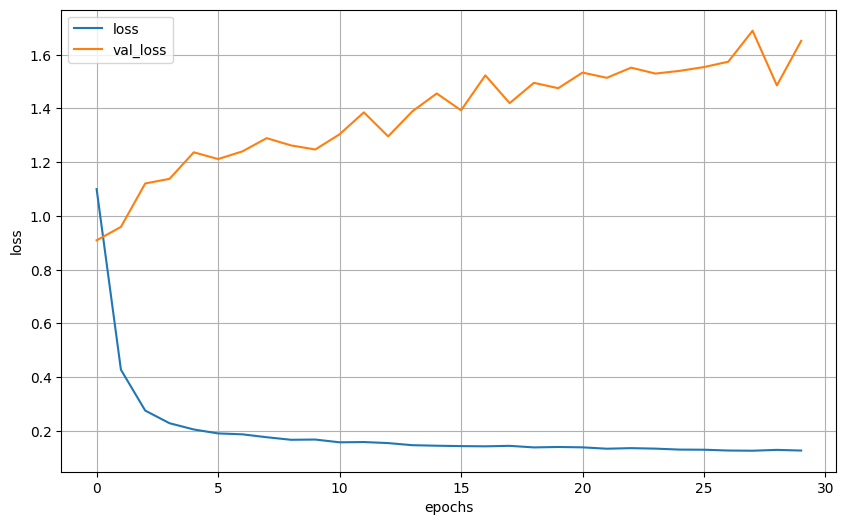

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

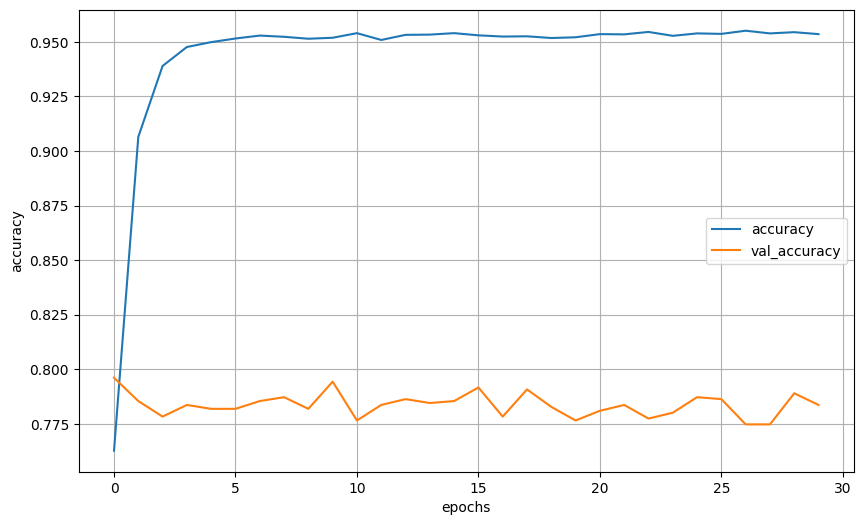

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

### Prediction with the test set

In [ ]:
error, accuracy, precision = model.evaluate(X_test, Y_test)

36/36 [==============================] - 0s 12ms/step - loss: 1.3274 - accuracy: 0.8237 - precision: 0.8481


In [ ]:
print("Error: ", error)
print("Accuracy: ", accuracy)
print("Precision: ", precision)

Error:  1.327358603477478
Accuracy:  0.8236865401268005
Precision:  0.8481131792068481
